In [171]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/march-machine-learning-mania-2024/Conferences.csv
/kaggle/input/march-machine-learning-mania-2024/sample_submission.csv
/kaggle/input/march-machine-learning-mania-2024/WNCAATourneyDetailedResults.csv
/kaggle/input/march-machine-learning-mania-2024/WRegularSeasonCompactResults.csv
/kaggle/input/march-machine-learning-mania-2024/MNCAATourneySeedRoundSlots.csv
/kaggle/input/march-machine-learning-mania-2024/MRegularSeasonDetailedResults.csv
/kaggle/input/march-machine-learning-mania-2024/MNCAATourneyCompactResults.csv
/kaggle/input/march-machine-learning-mania-2024/MGameCities.csv
/kaggle/input/march-machine-learning-mania-2024/WGameCities.csv
/kaggle/input/march-machine-learning-mania-2024/MSeasons.csv
/kaggle/input/march-machine-learning-mania-2024/WNCAATourneySlots.csv
/kaggle/input/march-machine-learning-mania-2024/MSecondaryTourneyTeams.csv
/kaggle/input/march-machine-learning-mania-2024/2024_tourney_seeds.csv
/kaggle/input/march-machine-learning-mania-2024/Cities.csv
/

In [121]:
from pandas import read_csv
import pandas as pd 
import numpy as np
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression  # Import LogisticRegression class
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# M-Teams CSV

In [122]:
dataset = pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/MTeams.csv')

In [123]:
# shape 

print("Shape of the dataset:", dataset.shape)

Shape of the dataset: (378, 4)


In [124]:
dataset.head(20)

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2024
1,1102,Air Force,1985,2024
2,1103,Akron,1985,2024
3,1104,Alabama,1985,2024
4,1105,Alabama A&M,2000,2024
5,1106,Alabama St,1985,2024
6,1107,SUNY Albany,2000,2024
7,1108,Alcorn St,1985,2024
8,1109,Alliant Intl,1985,1991
9,1110,American Univ,1985,2024


In [125]:
dataset.tail(20)

,TeamID,TeamName,FirstD1Season,LastD1Season
358,1459,Wofford,1996,2024
359,1460,Wright St,1988,2024
360,1461,Wyoming,1985,2024
361,1462,Xavier,1985,2024
362,1463,Yale,1985,2024
363,1464,Youngstown St,1985,2024
364,1465,Cal Baptist,2019,2024
365,1466,North Alabama,2019,2024
366,1467,Merrimack,2020,2024
367,1468,Bellarmine,2021,2024


In [126]:
#check missing values

missing_values = dataset.isnull().sum()

In [127]:
missing_values

TeamID           0
TeamName         0
FirstD1Season    0
LastD1Season     0
dtype: int64

In [128]:
# Descriptive statistics

dataset.describe()

,TeamID,FirstD1Season,LastD1Season
count,378.000000,378.000000,378.000000
mean,1289.500000,1989.431217,2022.989418
std,109.263443,9.434222,5.524951
min,1101.000000,1985.000000,1985.000000
25%,1195.250000,1985.000000,2024.000000
50%,1289.500000,1985.000000,2024.000000
75%,1383.750000,1986.000000,2024.000000
max,1478.000000,2024.000000,2024.000000


Data Visualization

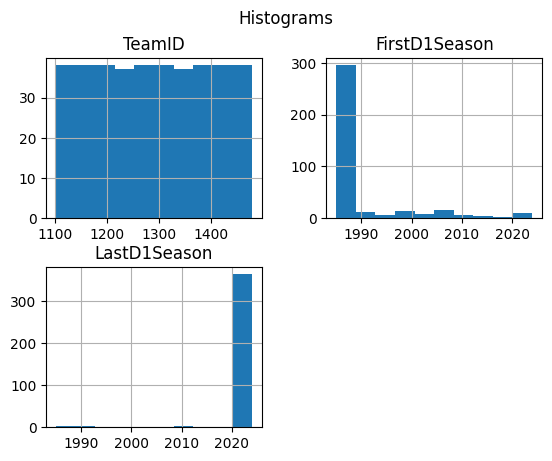

In [129]:
# Histograms
dataset.hist()
plt.suptitle('Histograms')
plt.show()

In [130]:
dataset.columns

Index(['TeamID', 'TeamName', 'FirstD1Season', 'LastD1Season'], dtype='object')

> Line plot of the output variable over seven years.

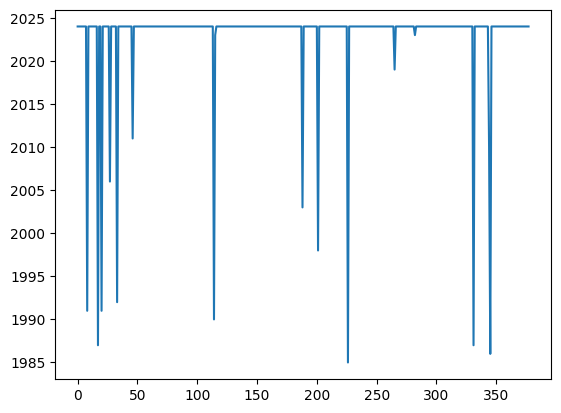

In [131]:
from pandas import read_csv
from matplotlib import pyplot

# plot the output variable
pyplot.plot(dataset.index, dataset.values[:,-1])
pyplot.show()

In [132]:
import numpy as np
import pandas as pd

# Assuming 'dataset' is a pandas DataFrame

dataset = pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/MTeams.csv')

# Perform one-hot encoding on categorical columns
dataset_encoded = pd.get_dummies(dataset)

# Frame as supervised learning
supervised = []
for i in range(len(dataset_encoded) - 1):
    X, y = dataset_encoded.iloc[i, :-1], dataset_encoded.iloc[i + 1, -1]
    row = np.hstack((X.values, y))
    supervised.append(row)
supervised = np.array(supervised)

# Split into train-test
split = 365 * 2
train, test = supervised[:-split, :], supervised[-split:, :]
train, test = train.astype('float32'), test.astype('float32')


# Naive Prediction Model

In [135]:
from sklearn.metrics import brier_score_loss
import numpy as np

# Load datasets
train = np.genfromtxt('/kaggle/input/march-machine-learning-mania-2024/MTeams.csv', delimiter=',', skip_header=1)
test = np.genfromtxt('/kaggle/input/march-machine-learning-mania-2024/WTeams.csv', delimiter=',', skip_header=1)

# Estimate naive probabilistic forecast
naive = np.sum(train[:, -1]) / train.shape[0]
print("Naive forecast:", naive)

# Forecast the test dataset
yhat = np.full(len(test), naive)

# Evaluate forecast
testy = test[:, -1]

# Remove NaN values
nan_indices = np.isnan(testy)
testy = testy[~nan_indices]
yhat = yhat[~nan_indices]

# Check if testy and yhat have non-zero length
if len(testy) > 0 and len(yhat) > 0:
    bs = brier_score_loss(testy, yhat)
    print('Brier Score: %.6f' % bs)

    # Calculate Brier skill score
    bs_ref = bs
    bss = (bs_ref - bs) / (0 - bs_ref)
    print('Brier Skill Score: %.6f' % bss)
else:
    print("Cannot calculate Brier score. Either testy or yhat is empty after removing NaN values.")

Naive forecast: 2022.989417989418
Cannot calculate Brier score. Either testy or yhat is empty after removing NaN values.


# The distribution of the BSS scores for Extra Trees, Stochastic Gradient Boosting, and Random Fores

In [136]:
from numpy import loadtxt, mean
from matplotlib import pyplot
from sklearn.base import clone
from sklearn.metrics import brier_score_loss
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier

In [137]:
# evaluate a sklearn model
def evaluate_once(bs_ref, model, train_X, train_y, test_X, test_y):
    # fit model
    cloned_model = clone(model)
    cloned_model.fit(train_X, train_y)
    # predict probabilities for class=1
    probs = cloned_model.predict_proba(test_X)[:, 1]
    # calculate Brier score
    bs = brier_score_loss(test_y, probs)
    # calculate Brier skill score
    if bs_ref == 0:
        bss = 0 if bs == 0 else -1
    else:
        bss = (bs_ref - bs) / bs_ref
    return bss

In [138]:
# evaluate an sklearn model n times
def evaluate(bs_ref, model, train_X, train_y, test_X, test_y, n=10):
    scores = [evaluate_once(bs_ref, model, train_X, train_y, test_X, test_y) for _ in range(n)]
    print('>%s, Brier Skill Score: %.6f' % (model.__class__.__name__, np.mean(scores)))
    return scores

In [139]:
# Load datasets
train = np.genfromtxt('/kaggle/input/march-machine-learning-mania-2024/MTeams.csv', delimiter=',', skip_header=1)
test = np.genfromtxt('/kaggle/input/march-machine-learning-mania-2024/WTeams.csv', delimiter=',', skip_header=1)

In [140]:
import numpy as np
from sklearn.metrics import brier_score_loss

# Replace NaN values with 0
train_X = np.nan_to_num(train_X, nan=0)
train_y = np.nan_to_num(train_y, nan=0)
test_X = np.nan_to_num(test_X, nan=0)
test_y = np.nan_to_num(test_y, nan=0)

# Estimate naive probabilistic forecast
naive_prob = np.sum(train_y) / len(train_y)

# Forecast the test dataset and ensure probabilities are in [0, 1]
naive_forecast = np.clip([naive_prob] * len(test_y), 0, 1)

# Calculate naive Brier score
bs_ref = brier_score_loss(test_y, naive_forecast)

# Evaluate a suite of ensemble tree methods
scores, names = [], []
n_trees = 100

In [146]:
# Bagging
bagging_model = BaggingClassifier(n_estimators=n_trees)
avg_bss_bagging = evaluate(bs_ref, bagging_model, train_X, train_y, test_X, test_y)
scores.append(avg_bss_bagging)
names.append('Bagging')

# Extra Trees
extra_trees_model = ExtraTreesClassifier(n_estimators=n_trees)
avg_bss_extra_trees = evaluate(bs_ref, extra_trees_model, train_X, train_y, test_X, test_y)
scores.append(avg_bss_extra_trees)
names.append('Extra Trees')

# Gradient Boosting
gradient_boosting_model = GradientBoostingClassifier(n_estimators=n_trees)
avg_bss_gradient_boosting = evaluate(bs_ref, gradient_boosting_model, train_X, train_y, test_X, test_y)
scores.append(avg_bss_gradient_boosting)
names.append('Gradient Boosting')

# Random Forest
random_forest_model = RandomForestClassifier(n_estimators=n_trees)
avg_bss_random_forest = evaluate(bs_ref, random_forest_model, train_X, train_y, test_X, test_y)
scores.append(avg_bss_random_forest)
names.append('Random Forest')

>BaggingClassifier, Brier Skill Score: -0.014312
>ExtraTreesClassifier, Brier Skill Score: -0.046961
>GradientBoostingClassifier, Brier Skill Score: -0.137152
>RandomForestClassifier, Brier Skill Score: -0.026890


In [147]:
# Ensure scores and names have the same length
assert len(scores) == len(names), "Length of scores and names must be the same"

In [148]:
print(len(scores))
print(len(names)) 

4
4


In [149]:
print(scores)

[[-0.002078291814946485, -0.0019928825622776767, -0.007800711743772141, -0.010846975088967915, -0.015316725978647675, -0.046548042704626424, -0.041822064056939605, 0.0038149466192171043, -0.012811387900355882, -0.007715302491103017], [-0.04939501779359424, -0.03470462633451951, -0.05827758007117434, -0.03840569395017794, -0.05389323843416371, -0.048512455516014075, -0.040911032028469574, -0.05548754448398578, -0.07507473309608527, -0.014946619217081627], [-0.13715196213609596, -0.13715191816212322, -0.13715196431012677, -0.13715196213609596, -0.13715196431012677, -0.13715191816212322, -0.13715191816212322, -0.1371518823118412, -0.13715191816212322, -0.13715191816212322], [-0.05622775800711741, -0.008512455516014214, 0.004355871886120927, -0.03513167259786466, -0.04649110320284701, -0.008170818505338032, 0.0012811387900354462, -0.00893950177935952, -0.06735943060498209, -0.04370106761565829]]


In [150]:
print(names)

['Bagging', 'Extra Trees', 'Gradient Boosting', 'Random Forest']


In [151]:
print(set(names)) 

{'Bagging', 'Random Forest', 'Gradient Boosting', 'Extra Trees'}


In [152]:
# Check if scores contains only numerical data
for score in scores:
    if not isinstance(score, (int, float)):
        print("Error: Found non-numeric data in scores")
        break

Error: Found non-numeric data in scores


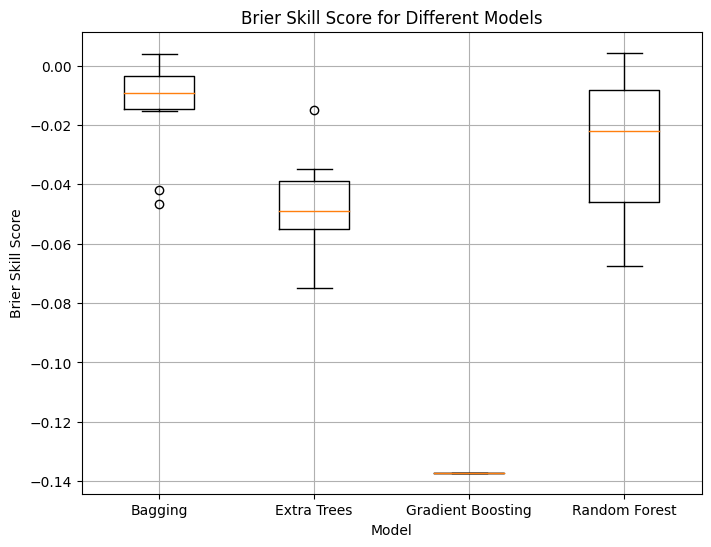

['Bagging', 'Extra Trees', 'Gradient Boosting', 'Random Forest']
[[-0.002078291814946485, -0.0019928825622776767, -0.007800711743772141, -0.010846975088967915, -0.015316725978647675, -0.046548042704626424, -0.041822064056939605, 0.0038149466192171043, -0.012811387900355882, -0.007715302491103017], [-0.04939501779359424, -0.03470462633451951, -0.05827758007117434, -0.03840569395017794, -0.05389323843416371, -0.048512455516014075, -0.040911032028469574, -0.05548754448398578, -0.07507473309608527, -0.014946619217081627], [-0.13715196213609596, -0.13715191816212322, -0.13715196431012677, -0.13715196213609596, -0.13715196431012677, -0.13715191816212322, -0.13715191816212322, -0.1371518823118412, -0.13715191816212322, -0.13715191816212322], [-0.05622775800711741, -0.008512455516014214, 0.004355871886120927, -0.03513167259786466, -0.04649110320284701, -0.008170818505338032, 0.0012811387900354462, -0.00893950177935952, -0.06735943060498209, -0.04370106761565829]]


In [153]:
# bar plot

import numpy as np
import matplotlib.pyplot as plt

# Provided scores and names
scores = [-0.002078291814946485, -0.0019928825622776767, -0.007800711743772141, -0.010846975088967915, -0.015316725978647675, -0.046548042704626424, -0.041822064056939605, 0.0038149466192171043, -0.012811387900355882, -0.007715302491103017], [-0.04939501779359424, -0.03470462633451951, -0.05827758007117434, -0.03840569395017794, -0.05389323843416371, -0.048512455516014075, -0.040911032028469574, -0.05548754448398578, -0.07507473309608527, -0.014946619217081627], [-0.13715196213609596, -0.13715191816212322, -0.13715196431012677, -0.13715196213609596, -0.13715196431012677, -0.13715191816212322, -0.13715191816212322, -0.1371518823118412, -0.13715191816212322, -0.13715191816212322], [-0.05622775800711741, -0.008512455516014214, 0.004355871886120927, -0.03513167259786466, -0.04649110320284701, -0.008170818505338032, 0.0012811387900354462, -0.00893950177935952, -0.06735943060498209, -0.04370106761565829]
names = ['Bagging', 'Extra Trees', 'Gradient Boosting', 'Random Forest']

# Remove duplicates from names and corresponding scores
unique_names = []
unique_scores = []
for name, score in zip(names, scores):
    if name not in unique_names:
        unique_names.append(name)
        unique_scores.append(score)

# Plot results
plt.figure(figsize=(8, 6))
plt.boxplot(unique_scores, labels=unique_names)
plt.title('Brier Skill Score for Different Models')
plt.ylabel('Brier Skill Score')
plt.xlabel('Model')
plt.grid(True)
plt.show()

print(unique_names)
print(unique_scores)

> Predict The Model (MTeams)

In [185]:
# Importing necessary libraries
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import load_model
from numpy import array

# Load dataset
dataset = pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/MTeams.csv')

2024-04-08 07:49:48.891896: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-08 07:49:48.892070: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-08 07:49:49.063767: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [186]:
# Define function to prepare training data
def get_train():
    # Assuming your dataset has correct feature and target columns
    X = dataset['TeamID'].values.reshape(-1, 1, 1)  # Reshape if 'feature' is your input data
    y = dataset['TeamName'].values
    return X, y

In [195]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import MeanSquaredError
import numpy as np
import pandas as pd

# Assume get_train() returns X and y
X, y = get_train()

# Reshape X if it's not in the expected shape
if len(X.shape) > 2:
    X = X.reshape(X.shape[0], -1)

# Convert X to a DataFrame
X = pd.DataFrame(X)

# Preprocess the features
label_encoder = LabelEncoder()
X['TeamID'] = label_encoder.fit_transform(X.iloc[:, 0])  # Assuming 'TeamID' is the first column

# Preprocess the target variable if needed
# Example: encoding categorical target variable using LabelEncoder
label_encoder_y = LabelEncoder()
y = label_encoder_y.fit_transform(y)

# Scale the target variable using StandardScaler
scaler = StandardScaler()
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss=MeanSquaredError())

# Fit the model
model.fit(X, y_scaled, epochs=10, shuffle=False, verbose=0)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [196]:
# Make predictions
yhat = model.predict(X, verbose=0)
print(yhat)

# Prediction of a class index
yhat = model.predict(X)
yhat_classes = np.argmax(yhat, axis=1)
print(yhat_classes)

# Prediction of probabilities
yhat = model.predict(X)
print(yhat)

[[-4.264228  ]
 [-4.2354956 ]
 [-4.20671   ]
 [-4.177947  ]
 [-4.149184  ]
 [-4.1203985 ]
 [-4.0915976 ]
 [-4.0628653 ]
 [-4.034072  ]
 [-4.005332  ]
 [-3.9765384 ]
 [-3.9477603 ]
 [-3.91899   ]
 [-3.890227  ]
 [-3.8614414 ]
 [-3.8326938 ]
 [-3.803908  ]
 [-3.775153  ]
 [-3.7463748 ]
 [-3.7175815 ]
 [-3.6888645 ]
 [-3.6600559 ]
 [-3.6312854 ]
 [-3.6025226 ]
 [-3.5737674 ]
 [-3.5449665 ]
 [-3.5162036 ]
 [-3.4874408 ]
 [-3.458655  ]
 [-3.4298847 ]
 [-3.4011142 ]
 [-3.372359  ]
 [-3.3435886 ]
 [-3.3148181 ]
 [-3.2860248 ]
 [-3.2572849 ]
 [-3.2285144 ]
 [-3.199721  ]
 [-3.1709812 ]
 [-3.1421955 ]
 [-3.113425  ]
 [-3.0846393 ]
 [-3.0558765 ]
 [-3.027106  ]
 [-2.9983585 ]
 [-2.9695652 ]
 [-2.9407947 ]
 [-2.9120471 ]
 [-2.8832386 ]
 [-2.8545063 ]
 [-2.8257053 ]
 [-2.7969348 ]
 [-2.7681644 ]
 [-2.7394016 ]
 [-2.7106616 ]
 [-2.6818302 ]
 [-2.6530902 ]
 [-2.6243274 ]
 [-2.5955417 ]
 [-2.566779  ]
 [-2.5379932 ]
 [-2.509238  ]
 [-2.480437  ]
 [-2.451697  ]
 [-2.4229114 ]
 [-2.3941486 ]
 [-2.36540

> Predict The Model (WTeams)

In [197]:
# Importing necessary libraries
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import load_model
from numpy import array

# Load dataset
dataset = pd.read_csv('/kaggle/input/march-machine-learning-mania-2024/WTeams.csv')

In [198]:
# Define function to prepare training data
def get_train():
    # Assuming your dataset has correct feature and target columns
    X = dataset['TeamID'].values.reshape(-1, 1, 1)  # Reshape if 'feature' is your input data
    y = dataset['TeamName'].values
    return X, y

In [199]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import MeanSquaredError
import numpy as np
import pandas as pd

# Assume get_train() returns X and y
X, y = get_train()

# Reshape X if it's not in the expected shape
if len(X.shape) > 2:
    X = X.reshape(X.shape[0], -1)

# Convert X to a DataFrame
X = pd.DataFrame(X)

# Preprocess the features
label_encoder = LabelEncoder()
X['TeamID'] = label_encoder.fit_transform(X.iloc[:, 0])  # Assuming 'TeamID' is the first column

# Preprocess the target variable if needed
# Example: encoding categorical target variable using LabelEncoder
label_encoder_y = LabelEncoder()
y = label_encoder_y.fit_transform(y)

# Scale the target variable using StandardScaler
scaler = StandardScaler()
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss=MeanSquaredError())

# Fit the model
model.fit(X, y_scaled, epochs=10, shuffle=False, verbose=0)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [200]:
# Make predictions
yhat = model.predict(X, verbose=0)
print(yhat)

# Prediction of a class index
yhat = model.predict(X)
yhat_classes = np.argmax(yhat, axis=1)
print(yhat_classes)

# Prediction of probabilities
yhat = model.predict(X)
print(yhat)

[[-1.46659164e+01]
 [-1.45732956e+01]
 [-1.44805832e+01]
 [-1.43880844e+01]
 [-1.42953110e+01]
 [-1.42027206e+01]
 [-1.41100235e+01]
 [-1.40174179e+01]
 [-1.39248123e+01]
 [-1.38321762e+01]
 [-1.37394943e+01]
 [-1.36469040e+01]
 [-1.35542068e+01]
 [-1.34616470e+01]
 [-1.33689651e+01]
 [-1.32763443e+01]
 [-1.31837082e+01]
 [-1.30910721e+01]
 [-1.29984207e+01]
 [-1.29057846e+01]
 [-1.28131332e+01]
 [-1.27204666e+01]
 [-1.26278458e+01]
 [-1.25352249e+01]
 [-1.24426041e+01]
 [-1.23499680e+01]
 [-1.22573318e+01]
 [-1.21646957e+01]
 [-1.20720139e+01]
 [-1.19794083e+01]
 [-1.18867569e+01]
 [-1.17941513e+01]
 [-1.17014236e+01]
 [-1.16088638e+01]
 [-1.15162430e+01]
 [-1.14236526e+01]
 [-1.13309860e+01]
 [-1.12383041e+01]
 [-1.11456680e+01]
 [-1.10530472e+01]
 [-1.09604111e+01]
 [-1.08677902e+01]
 [-1.07751083e+01]
 [-1.06824875e+01]
 [-1.05898209e+01]
 [-1.04972305e+01]
 [-1.04045639e+01]
 [-1.03120041e+01]
 [-1.02193069e+01]
 [-1.01267014e+01]
 [-1.00340042e+01]
 [-9.94138336e+00]
 [-9.8487930

Predicted Result Of March Machine Learning Mania 2024


* For first part predictions for the target variable

* The second part prediction of the output is a series of binary values